# Crime Rate Predection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
pyo.init_notebook_mode()
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor


Output hidden; open in https://colab.research.google.com to view.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Crime_data.csv")
data.head()

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201903,201904,201905,201906,201907,...,202104,202105,202106,202107,202108,202109,202110,202111,202112,202201
0,E01000006,Barking and Dagenham 016A,E09000002,Arson and Criminal Damage,Arson,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E01000006,Barking and Dagenham 016A,E09000002,Arson and Criminal Damage,Criminal Damage,1,2,0,1,0,...,0,1,1,0,0,0,0,0,1,2
2,E01000006,Barking and Dagenham 016A,E09000002,Burglary,Burglary Business and Community,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,E01000006,Barking and Dagenham 016A,E09000002,Burglary,Domestic Burglary,1,0,3,1,0,...,0,0,0,0,0,0,1,1,1,0
4,E01000006,Barking and Dagenham 016A,E09000002,Drug Offences,Drug Trafficking,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('The shape of training set: %s crimes and %s features'%(data.shape[0],data.shape[1]))

The shape of training set: 153928 crimes and 147 features


In [ ]:
print("Columns in our dataset: " , data.head)

Columns in our dataset:  <bound method NDFrame.head of         LSOA Code                  LSOA Name    Borough  \
0       E01000006  Barking and Dagenham 016A  E09000002   
1       E01000006  Barking and Dagenham 016A  E09000002   
2       E01000006  Barking and Dagenham 016A  E09000002   
3       E01000006  Barking and Dagenham 016A  E09000002   
4       E01000006  Barking and Dagenham 016A  E09000002   
...           ...                        ...        ...   
153923  E01035722           Westminster 024G  E09000033   
153924  E01035722           Westminster 024G  E09000033   
153925  E01035722           Westminster 024G  E09000033   
153926  E01035722           Westminster 024G  E09000033   
153927  E01035722           Westminster 024G  E09000033   

                     Major Category                      Minor Category  \
0         Arson and Criminal Damage                               Arson   
1         Arson and Criminal Damage                     Criminal Damage   
2          

In [ ]:
# Drop irrelevant columns (e.g., LSOA Code, LSOA Name, Borough)
df = data.drop(columns=['LSOA Code', 'LSOA Name', 'Borough'])

In [ ]:

print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '201901', '201902', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201304', '201305', '201306', '201307', '201308', '201309', '201310', '201311', '201312', '201401', '201402', '201403', '201404', '201405', '201406', '201407', '201408', '201409', '201410', '201411', '201412', '201501', '201502', '201503', '201504', '201505', '201506', '201507', '201508', '201509', '201510', '201511', '201512', '201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702',

## Data Processing
### checking for null values

In [ ]:
df.isnull().sum(axis=0)

Major Category    0
Minor Category    0
201903            0
201904            0
201905            0
                 ..
202109            0
202110            0
202111            0
202112            0
202201            0
Length: 144, dtype: int64

### Checking for Distinct Values

In [ ]:
categorical_col = df[['Major Category', 'Minor Category']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

Major Category
Miscellaneous Crimes Against Society    36749
Theft                                   18974
Vehicle Offences                        18972
Public Order Offences                   15454
Possession of Weapons                   14442
Violence Against the Person             11105
Burglary                                 9974
Drug Offences                            9771
Arson and Criminal Damage                9504
Robbery                                  8983
Name: count, dtype: int64

Minor Category
Criminal Damage                                       4988
Possession of Drugs                                   4988
Other Theft                                           4988
Violence with Injury                                  4988
Violence without Injury                               4988
Public Fear Alarm or Distress                         4988
Domestic Burglary                                     4988
Theft from a Motor Vehicle                            4987
Theft or Ta

## Exploratory Data Analysis

In [ ]:
print(df.describe())

              201903         201904         201905         201906  \
count  153928.000000  153928.000000  153928.000000  153928.000000   
mean        0.493374       0.465588       0.480497       0.477152   
std         2.760740       2.710046       2.408156       2.356123   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       464.000000     385.000000     348.000000     318.000000   

              201907         201908         201909         201910  \
count  153928.000000  153928.000000  153928.000000  153928.000000   
mean        0.505405       0.473644       0.470168       0.503989   
std         2.270808       2.130048       2.164416       2.474066   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

#### Univariate analysis

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

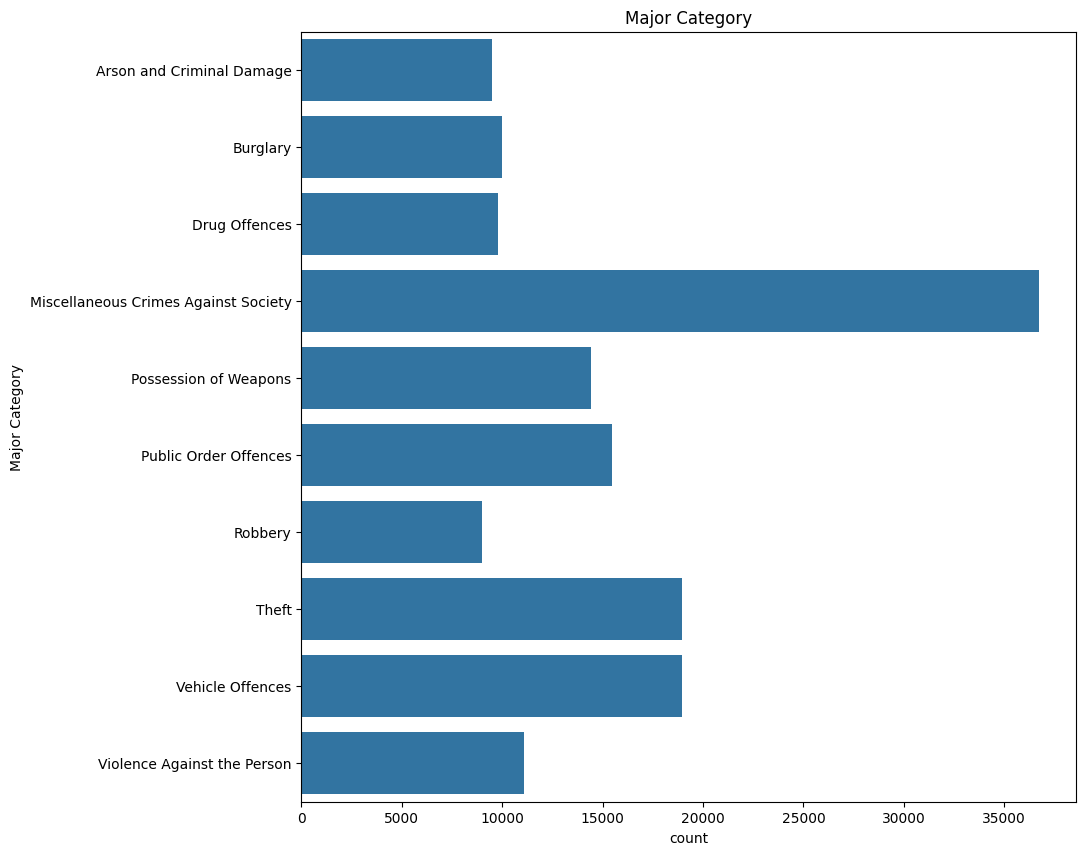

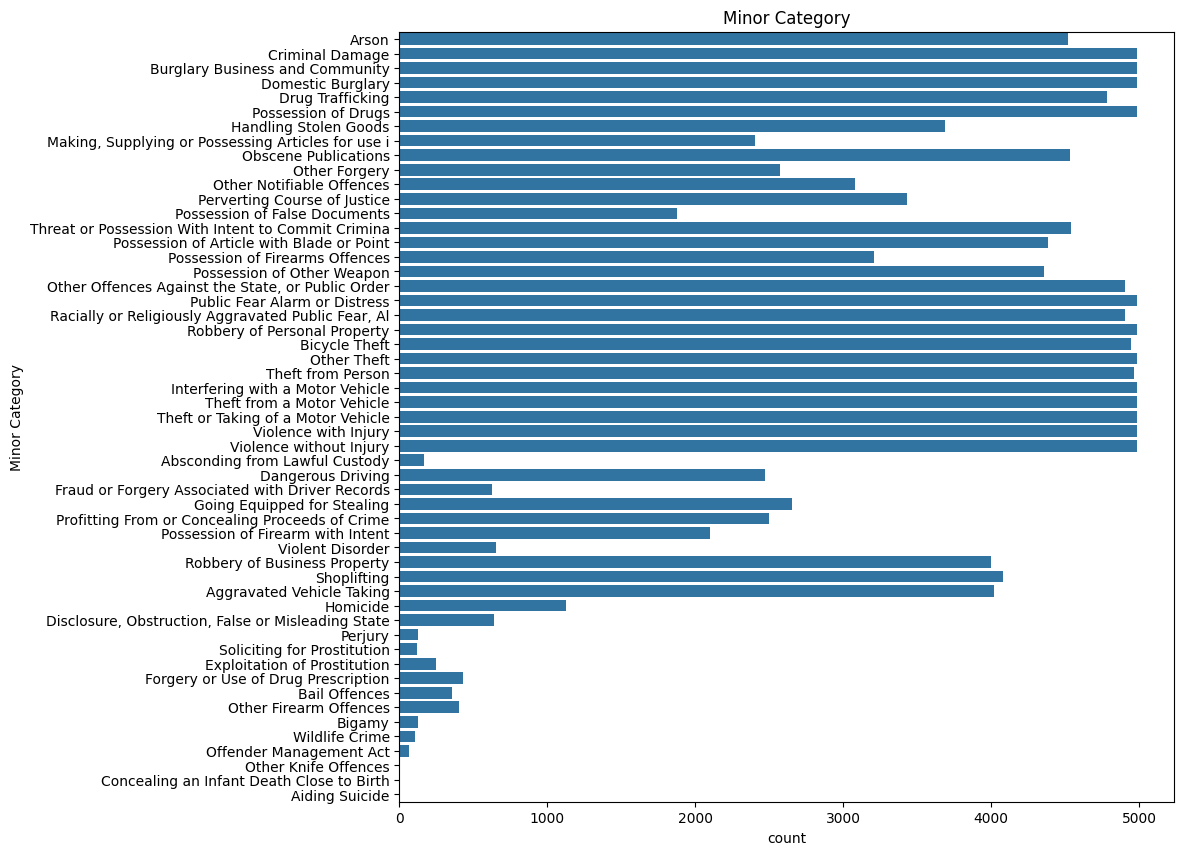

In [ ]:
for col in categorical_col:
    plt.figure(figsize=(10, 10))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

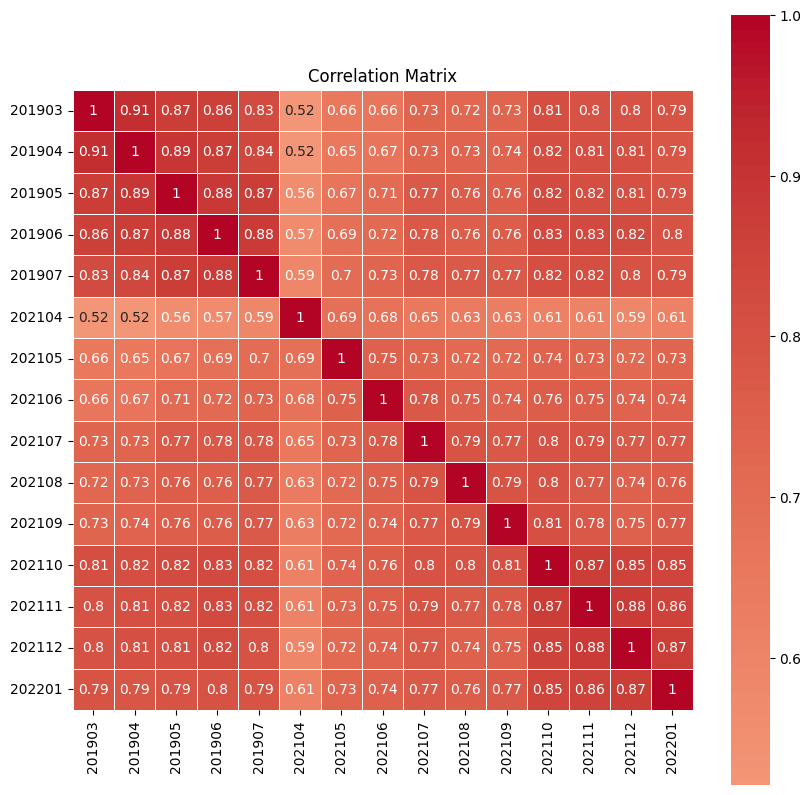

In [ ]:
columns_of_interest = ['201903', '201904', '201905', '201906', '201907',
                       '202104', '202105', '202106', '202107', '202108',
                       '202109', '202110', '202111', '202112', '202201']

# Create correlation matrix
corr = df[columns_of_interest].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, square=True, annot=True, linewidth=.4, center=0, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

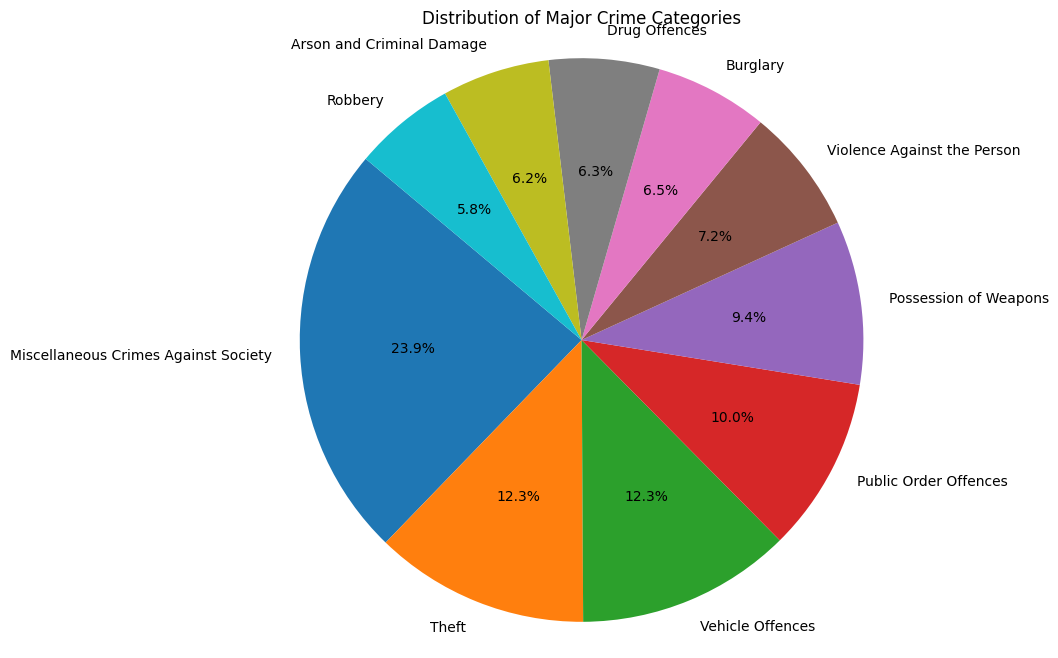

In [ ]:
Major_category_count = df['Major Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Major_category_count, labels=Major_category_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Major Crime Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
crime_count_columns = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the total sum of crime counts across all crime count columns
total_crime_count = df[crime_count_columns].sum().sum()

print("Total sum of crime counts from 201901 to 202201:", total_crime_count)

Total sum of crime counts from 201901 to 202201: 8943932


#### Data cleaning for modeling

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named df

# Group by 'Minor Category' and sum the corresponding values while dropping unnecessary columns
aggregated_df = df.groupby('Minor Category').sum().reset_index()

# Display the aggregated DataFrame
print(aggregated_df)


                                       Minor Category  \
0                      Absconding from Lawful Custody   
1                           Aggravated Vehicle Taking   
2                                      Aiding Suicide   
3                                               Arson   
4                                       Bail Offences   
5                                       Bicycle Theft   
6                                              Bigamy   
7                     Burglary Business and Community   
8           Concealing an Infant Death Close to Birth   
9                                     Criminal Damage   
10                                  Dangerous Driving   
11  Disclosure, Obstruction, False or Misleading S...   
12                                  Domestic Burglary   
13                                   Drug Trafficking   
14                       Exploitation of Prostitution   
15                Forgery or Use of Drug Prescription   
16    Fraud or Forgery Associat

In [ ]:

# Calculate the total number of observations in the dataset
total_observations = len(aggregated_df)

# Calculate the overall crime rate
overall_crime_rate = total_crime_count / total_observations

overall_crime_rate_percentage = round(overall_crime_rate, 2)

# Print the overall crime rate as a percentage
print("Overall Crime Rate:", overall_crime_rate_percentage, "%")

Overall Crime Rate: 168753.43 %


In [ ]:
# Step 1: Aggregate Data
aggregated_df['Total_Crime_Count'] = aggregated_df.iloc[:, 5:].sum(axis=1)

In [ ]:
numerical_columns = ['201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '201901', '201902', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201304', '201305', '201306', '201307', '201308', '201309', '201310', '201311', '201312', '201401', '201402', '201403', '201404', '201405', '201406', '201407', '201408', '201409', '201410', '201411', '201412', '201501', '201502', '201503', '201504', '201505', '201506', '201507', '201508', '201509', '201510', '201511', '201512', '201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201']

aggregated_df['crime_rate'] = aggregated_df[numerical_columns].mean(axis=1)

In [ ]:
aggregated_df = aggregated_df.drop(columns=['Major Category'])

In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'aggregated_data.csv'

# Convert the DataFrame to a CSV file
aggregated_df.to_csv(csv_file_path, index=False)

# Print a message to confirm the file has been saved
print(f"CSV file saved at: {csv_file_path}")

CSV file saved at: aggregated_data.csv


In [ ]:
aggregated_df.head(5)

,Minor Category,201903,201904,201905,201906,201907,201908,201909,201910,201911,...,202106,202107,202108,202109,202110,202111,202112,202201,Total_Crime_Count,crime_rate
0,Absconding from Lawful Custody,1,3,4,2,9,5,2,7,5,...,5,8,3,6,2,2,3,4,331,2.387324
1,Aggravated Vehicle Taking,83,67,97,103,92,108,84,107,81,...,59,59,76,53,55,46,46,69,9748,70.387324
2,Aiding Suicide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,4,0.028169
3,Arson,149,179,185,146,181,174,204,161,168,...,152,139,155,122,153,160,128,132,24312,174.823944
4,Bail Offences,3,2,2,10,5,13,8,7,6,...,2,2,0,0,2,1,2,0,485,3.464789


## Model Building

In [ ]:
aggregated_df['crime_rate'].dtype

dtype('float64')

In [ ]:
# Step 2: Data Preprocessing and modeling

# Separate features (X) and target variable (y)
X = aggregated_df[['201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '201901', '201902', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201304', '201305', '201306', '201307', '201308', '201309', '201310', '201311', '201312', '201401', '201402', '201403', '201404', '201405', '201406', '201407', '201408', '201409', '201410', '201411', '201412', '201501', '201502', '201503', '201504', '201505', '201506', '201507', '201508', '201509', '201510', '201511', '201512', '201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201']]
y = aggregated_df['crime_rate']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (42, 142)
Shape of X_test: (11, 142)
Shape of y_train: (42,)
Shape of y_test: (11,)


In [ ]:
# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6.74079220998114
R^2 Score: 0.9999990362897215


In [ ]:
# Create the neural network regressor model
model_nn = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Training the model
model_nn.fit(X_train, y_train)

# Making predictions
y_pred_nn = model.predict(X_test)

In [ ]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Mean Squared Error:", mse_nn)
print("R^2 Score:", r2_nn)

Mean Squared Error: 6.74079220998114
R^2 Score: 0.9999990362897215


## Predecting the crime rate with dummy data

In [ ]:
data_test = aggregated_df[['201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '201901', '201902', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201304', '201305', '201306', '201307', '201308', '201309', '201310', '201311', '201312', '201401', '201402', '201403', '201404', '201405', '201406', '201407', '201408', '201409', '201410', '201411', '201412', '201501', '201502', '201503', '201504', '201505', '201506', '201507', '201508', '201509', '201510', '201511', '201512', '201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201']][:5]


In [ ]:
data_test

,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,...,202104,202105,202106,202107,202108,202109,202110,202111,202112,202201
0,1,3,4,2,9,5,2,7,5,4,...,3,3,5,8,3,6,2,2,3,4
1,83,67,97,103,92,108,84,107,81,98,...,53,39,59,59,76,53,55,46,46,69
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
3,149,179,185,146,181,174,204,161,168,141,...,173,147,152,139,155,122,153,160,128,132
4,3,2,2,10,5,13,8,7,6,12,...,1,3,2,2,0,0,2,1,2,0


In [ ]:
data_test.to_csv('data_test.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [ ]:
test_df = pd.read_csv('data_test.csv')

Edited the values with new random values to verify

In [ ]:
test_df

,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,...,202104,202105,202106,202107,202108,202109,202110,202111,202112,202201
0,1,3,4,2,9,5,2,7,5,4,...,3,3,5,8,3,6,2,2,3,4
1,83,67,97,103,92,108,84,107,81,98,...,53,39,59,59,76,53,55,46,46,69
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
3,149,179,185,146,181,174,204,161,168,141,...,173,147,152,139,155,122,153,160,128,132
4,3,2,2,10,5,13,8,7,6,12,...,1,3,2,2,0,0,2,1,2,0


#### Predicted values using Linear Regression

In [1]:
predicted_values_lr = model.predict(test_df)
print("Predicted crime rate for Absconding from Lawful Custody, Aggravated Vehicle Taking, Aiding Suicide, Arson, Bail Offences is:", predicted_values_lr.round())

NameError: name 'model' is not defined

#### Predected values using Neural Networks

In [ ]:
predicted_values_nn = model_nn.predict(test_df)
print("Predicted crime rate for Absconding from Lawful Custody, Aggravated Vehicle Taking, Aiding Suicide, Arson, Bail Offences is:", predicted_values_nn.round())

Predicted crime rate for Absconding from Lawful Custody, Aggravated Vehicle Taking, Aiding Suicide, Arson, Bail Offences is: [  3.  71.   0. 193.  -0.]
